In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from hmmlearn import hmm
from IOHMM_v2 import IOHMM_model

In [2]:
# Generate data
hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)
hmm_model.startprob_ = np.array([0.0, 1.0])
hmm_model.transmat_ = np.array([[0.9, 0.1],
                                [0.1, 0.9]])
hmm_model.means_ = np.array([[-10.0], [10.0]])
hmm_model.covars_ = np.array([[.1], [.1]])
# Sample data
X, Z = hmm_model.sample(20)
# Dataframe
data = pd.DataFrame(X, columns=['X'])
data['Z'] = Z

output = torch.tensor(data['X'].values, dtype=torch.float32)
input = torch.ones(output.size(), dtype=torch.float32).unsqueeze(1)

In [3]:
print(data)

            X  Z
0    9.837937  1
1   -9.772614  0
2    9.972405  1
3    9.641348  1
4    9.878340  1
5  -10.416938  0
6  -10.304167  0
7   10.000263  1
8    9.872134  1
9    9.665951  1
10   9.903731  1
11  10.320962  1
12  10.212698  1
13 -10.054666  0
14  -9.583840  0
15  -9.794137  0
16 -10.086580  0
17  -9.627420  0
18 -10.217114  0
19  -9.551325  0


In [4]:
print("Input size:", input.size())
print("Output size:", output.size())

Input size: torch.Size([20, 1])
Output size: torch.Size([20])


In [5]:
iohmm = IOHMM_model(num_states=2, inputs=input, outputs=output, max_iter=10000, tol=1e-40)

In [6]:
print("Initial parameters:")
print(f"Theta transition:{iohmm.theta_transition}")
print(f"Theta emission:{iohmm.theta_emission}")

Initial parameters:
Theta transition:Parameter containing:
tensor([[[ 0.2610, -0.5646],
         [-0.0803, -0.2778]],

        [[ 0.5417,  1.7452],
         [-0.2756,  1.5338]]], requires_grad=True)
Theta emission:Parameter containing:
tensor([[-2.6117, -0.9975],
        [-0.6163, -0.0784]], requires_grad=True)


In [7]:
iohmm.baum_welch()

iteration 0
old likelihood: -inf


/orfeo/cephfs/home/dssc/scarpene/jupyter/lib64/python3.9/site-packages/torch/autograd/graph.py:744: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


iteration 1
old likelihood: tensor([[-83.7654]])
iteration 2
old likelihood: tensor([[-80.7825]])
iteration 3
old likelihood: tensor([[-80.2349]])
iteration 4
old likelihood: tensor([[-79.7683]])
iteration 5
old likelihood: tensor([[-79.3481]])
iteration 6
old likelihood: tensor([[-78.9639]])
iteration 7
old likelihood: tensor([[-78.6087]])
iteration 8
old likelihood: tensor([[-78.2839]])
iteration 9
old likelihood: tensor([[-77.9839]])
iteration 10
old likelihood: tensor([[-77.7081]])
iteration 11
old likelihood: tensor([[-77.4537]])
iteration 12
old likelihood: tensor([[-77.2246]])
iteration 13
old likelihood: tensor([[-77.0123]])
iteration 14
old likelihood: tensor([[-76.8177]])
iteration 15
old likelihood: tensor([[-76.6400]])
iteration 16
old likelihood: tensor([[-76.4780]])
iteration 17
old likelihood: tensor([[-76.3284]])
iteration 18
old likelihood: tensor([[-76.1925]])
iteration 19
old likelihood: tensor([[-76.0667]])
iteration 20
old likelihood: tensor([[-75.9533]])
iteration

In [12]:
iohmm.viterbi_()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

In [8]:
print("Final parameters:")
print(f"Theta transition:{iohmm.theta_transition}")
print(f"Theta emission:{iohmm.theta_emission}")

Final parameters:
Theta transition:Parameter containing:
tensor([[[ 0.0627, -0.7630],
         [-1.3221, -1.5196]],

        [[ 0.7401,  1.9436],
         [ 0.9662,  2.7756]]], requires_grad=True)
Theta emission:Parameter containing:
tensor([[-2.4470, -0.8328],
        [-0.2822,  0.2557]], requires_grad=True)


[-inf, tensor([[-83.7654]]), tensor([[-80.7825]]), tensor([[-80.2349]]), tensor([[-79.7683]]), tensor([[-79.3481]]), tensor([[-78.9639]]), tensor([[-78.6087]]), tensor([[-78.2839]]), tensor([[-77.9839]]), tensor([[-77.7081]]), tensor([[-77.4537]]), tensor([[-77.2246]]), tensor([[-77.0123]]), tensor([[-76.8177]]), tensor([[-76.6400]]), tensor([[-76.4780]]), tensor([[-76.3284]]), tensor([[-76.1925]]), tensor([[-76.0667]]), tensor([[-75.9533]]), tensor([[-75.8478]]), tensor([[-75.7521]]), tensor([[-75.6633]]), tensor([[-75.5831]]), tensor([[-75.5091]]), tensor([[-75.4423]]), tensor([[-75.3796]]), tensor([[-75.3219]]), tensor([[-75.2711]]), tensor([[-75.2222]]), tensor([[-75.1795]]), tensor([[-75.1374]]), tensor([[-75.1017]]), tensor([[-75.0676]]), tensor([[-75.0367]]), tensor([[-75.0084]]), tensor([[-74.9808]]), tensor([[-74.9560]]), tensor([[-74.9340]]), tensor([[-74.9137]]), tensor([[-74.8946]]), tensor([[-74.8770]]), tensor([[-74.8593]]), tensor([[-74.8439]]), tensor([[-74.8293]]), ten

/tmp/ipykernel_539495/4278840530.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  history = [float(h.numpy()) if torch.is_tensor(h) else float(h) for h in iohmm.history]


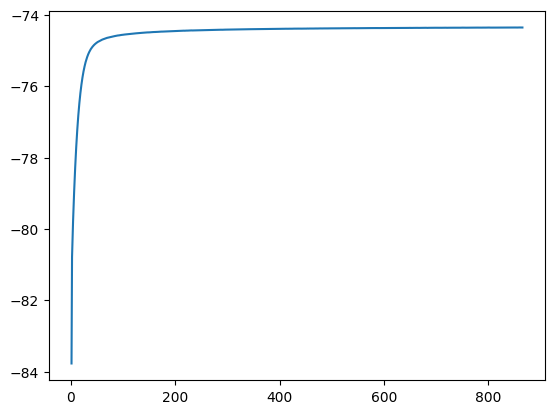

In [9]:
print(iohmm.history)

# Convert tensors to floats
history = [float(h.numpy()) if torch.is_tensor(h) else float(h) for h in iohmm.history]

# Plot the history
plt.plot(history)

In [10]:
#iohmm.viterbi()

State 0 distribution:
Mean: -3.279754161834717
Standard deviation: 1.5951570272445679




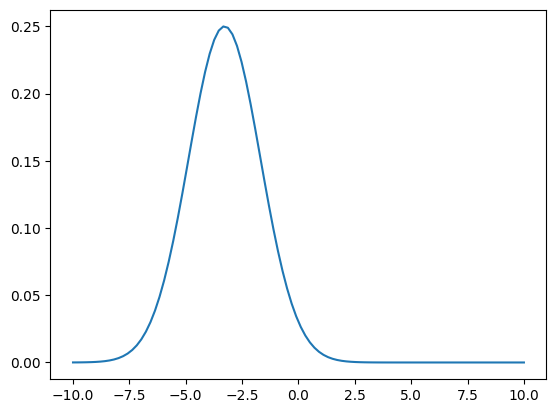

State 1 distribution:
Mean: -0.026424139738082886
Standard deviation: 9.939034461975098




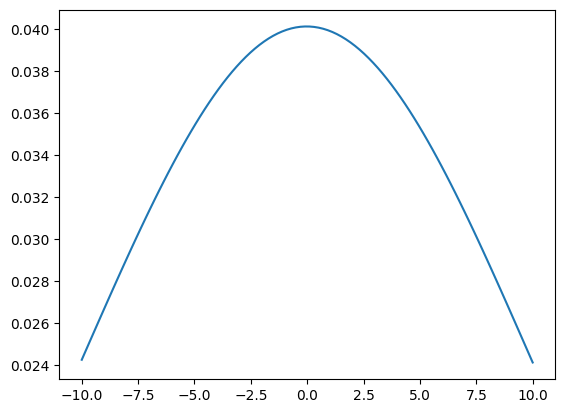

In [11]:
iohmm.plot_state_distribution()